## Examples from "Classical Approaches to Chiral Polaritonics"

## Import modules

In [4]:
import transfermat_scatt as ts
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from matplotlib.patches import Rectangle
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)
from scipy.ndimage.filters import gaussian_filter

/var/folders/br/42j9t5qj4x75mdrmlmnpt4kr0000gn/T/ipykernel_71515/710249872.py:9: DeprecationWarning: Please import `gaussian_filter` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.ndimage.filters import gaussian_filter


## Dielectric permeability $\varepsilon$ and chiral coupling $\kappa$

In [5]:
def eps_DL(epsinf, omegap, omega, omega0=0, gamma=0, k0=0):
    eps = epsinf + (omegap**2 / ((omega0**2 - omega**2) - 1j * gamma * omega))  # dispersive dielectric function
    n = np.sqrt(eps)
    
    if k0 != 0:
        k = k0 * ((omegap**2 * omega) / (omega0 * ((omega0**2 - omega**2) - 1j * gamma * omega)))  # chiral coupling
        return eps, n, k

    else:
        return eps, n, k0

## Calculation for Fig.9a

In [14]:
d = np.linspace(10, 500, 500)
omega  = np.linspace(1.6, 2.4, 500)[:,None]

eps_Ag, n_Ag, k_Ag  = eps_DL(epsinf=4.77574276, omegap=9.48300763, omega=omega, omega0=0, gamma=0.17486845, k0=0.0)
eps_mol, n_mol, k_mol = eps_DL(epsinf=2.89, omegap=0.05, omega=omega, omega0=2.0, gamma=0.05, k0=1e-3)


air_infty = ts.MaterialLayer(d=np.inf, eps=1)
#air_thin  = ts.MaterialLayer(d=0,      eps=1)
Ag_mirror = ts.MaterialLayer(d=30,     eps=eps_Ag)
molecules = ts.MaterialLayer(d=d,    eps=eps_mol, kappa=k_mol)

#omegaPR = 2
#gammaPR = 0.01
#mirror_1 = ts.helicity_preserving_mirror(omegaJ,omegaPR=omegaPR,gammaPR=gammaPR,enantiomer=False)
#mirror_2 = ts.helicity_preserving_mirror(omegaJ,omegaPR=omegaPR,gammaPR=gammaPR,enantiomer=True)

S_Ag = ts.TScat([air_infty, Ag_mirror, molecules, Ag_mirror, air_infty], omega, theta0=0.)

## Plot for Fig.9a

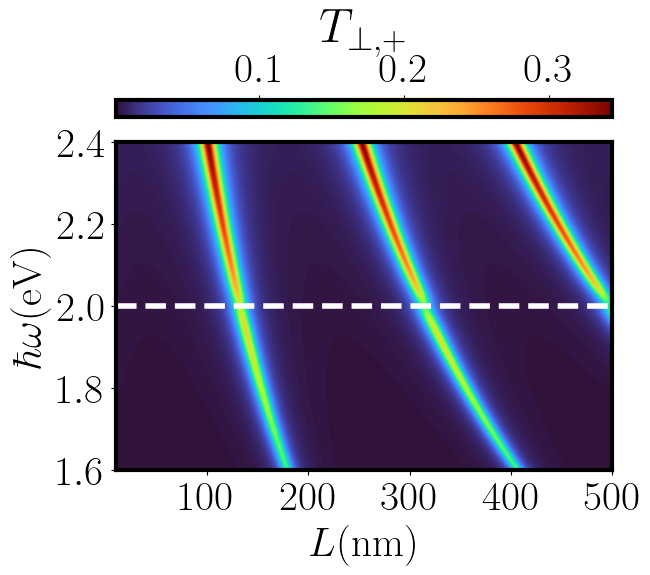

In [19]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.grid(False)

ax.set_xlabel(r"$L\mathrm{(nm)}$", size = 30)
ax.set_ylabel(r"$\hbar \omega \mathrm{(eV)}$",size = 30)

im1 = ax.pcolormesh(d, omega, S_Ag.Tsp, cmap = "turbo", shading = "gouraud")
divider = make_axes_locatable(ax)
cax = divider.append_axes('top', size='5%', pad=0.25)
cbar = fig.colorbar(im1, cax=cax, orientation='horizontal', ticklocation = 'top')
cbar.set_label(r'$T_{\perp,+}$', labelpad = 7, y = 1.05, rotation = 0, size = 35)
ax.axhline(y=2.0, color='w', linestyle='--', linewidth=4)
plt.rcParams.update({ "text.usetex": True, "font.family": "Helvetica"})
plt.rcParams['axes.linewidth'] = 3
plt.rcParams['legend.fontsize']= 11
plt.rcParams['xtick.labelsize'] = 30      
plt.rcParams['ytick.labelsize'] = 30
ax.xaxis.set_major_locator(MultipleLocator(100))
ax.yaxis.set_major_locator(MultipleLocator(0.2))
#fig.savefig("Fig9a.pdf", bbox_inches='tight')

## Calculation for Fig.14a

In [34]:
d = np.linspace(70, 450, 500)
omega  = np.linspace(1.5, 2.9, 500)[:,None]

#eps_Ag, n_Ag, k_Ag  = eps_DL(epsinf=4.77574276, omegap=9.48300763, omega=omega, omega0=2.2, gamma=0.17486845, k0=0.0)
eps_mol, n_mol, k_mol = eps_DL(epsinf=2.89, omegap=0.5, omega=omega, omega0=2.2, gamma=0.05, k0=1e-3)

air_infty = ts.MaterialLayer(d=np.inf, eps=1)
air_thin  = ts.MaterialLayer(d=0,      eps=1)
#Ag_mirror = ts.MaterialLayer(d=16,     eps=eps_Ag)
molecules = ts.MaterialLayer(d=d,    eps=eps_mol, kappa=k_mol)

omegaPR = 2
gammaPR = 0.01
mirror_1 = ts.helicity_preserving_mirror(omega,omegaPR=omegaPR,gammaPR=gammaPR,enantiomer=False)
mirror_2 = ts.helicity_preserving_mirror(omega,omegaPR=omegaPR,gammaPR=gammaPR,enantiomer=True)

#S_Ag = ts.TScat([air_infty, Ag_mirror, molecules, Ag_mirror, air_infty], omega, theta0=0.)
S_HP = ts.TScat([air_infty, mirror_1, air_thin, molecules, air_thin, mirror_2, air_infty], omega, theta0=0.)

## Plot for Fig.14a

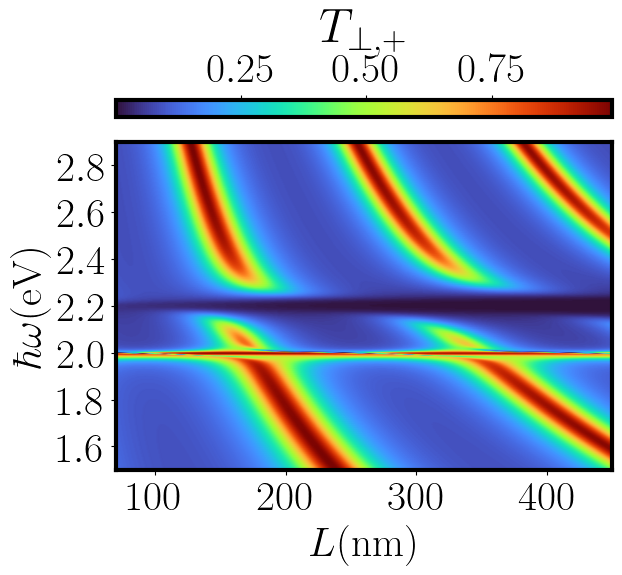

In [35]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.grid(False)

ax.set_xlabel(r"$L\mathrm{(nm)}$", size = 30)
ax.set_ylabel(r"$\hbar \omega \mathrm{(eV)}$",size = 30)

im1 = ax.pcolormesh(d, omega, S_HP.Tsp, cmap = "turbo", shading = "gouraud")
divider = make_axes_locatable(ax)
cax = divider.append_axes('top', size='5%', pad=0.25)
cbar = fig.colorbar(im1, cax=cax, orientation='horizontal', ticklocation = 'top')
cbar.set_label(r'$T_{\perp,+}$', labelpad = 7, y = 1.05, rotation = 0, size = 35)
plt.rcParams.update({ "text.usetex": True, "font.family": "Helvetica"})
plt.rcParams['axes.linewidth'] = 3
plt.rcParams['legend.fontsize']= 11
#plt.rcParams['lines.linewidth'] = 80
plt.rcParams['xtick.labelsize'] = 30      
plt.rcParams['ytick.labelsize'] = 30
ax.xaxis.set_major_locator(MultipleLocator(100))
ax.yaxis.set_major_locator(MultipleLocator(0.2))
#fig.savefig("Fig14a.pdf", bbox_inches='tight')